In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')

# Task 1

In [33]:
# N=1000, 10000, 100000, 1000000
# k=50, 100, 200
wsg3 = nx.watts_strogatz_graph(n=1000, k=50, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=50, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=50, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=50, p=0.01)

In [37]:
def giant_when_removing(graph):
    """Returns the sizes of biggest subgraphs for each fraction of removed nodes
    Fractions start at 0.5 and go to ca. 0.97 (it's amount of nodes divided by elements from fractions array)"""
    giants = list()
    # Couldn't thnik of smarter solution
    fractions = np.array([2.0, 1.75, 1.5, 1.3, 1.2, 1.1, 1.05, 1.03])

    for f in fractions:
        x = np.random.choice(len(graph.nodes()), int(len(graph.nodes())/f), replace=False)
        gc = graph.copy()
        gc.remove_nodes_from(x)
        giants.append(len(max(nx.connected_components(gc), key = len)))
    return giants

def giant_without_removing(graph):
    """This is basically len(graph.nodes())"""
    return len(max(nx.connected_components(graph), key = len))

In [47]:
gs = list()
gs.append([x/giant_without_removing(wsg3) for x in giant_when_removing(wsg3)])
gs.append([x/giant_without_removing(wsg4) for x in giant_when_removing(wsg4)])
gs.append([x/giant_without_removing(wsg5) for x in giant_when_removing(wsg5)])
#gs.append([x/giant_without_removing(wsg6) for x in giant_when_removing(wsg6)])
gs

KeyboardInterrupt: 

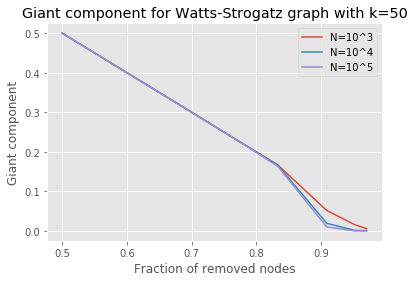

In [49]:
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.plot(fractions, gs[0])
plt.plot(fractions, gs[1])
plt.plot(fractions, gs[2])
#plt.plot(fractions, gs[3])
plt.title("Giant component for Watts-Strogatz graph with k=50")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5"])
plt.show()